In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

CODE_DIR = os.path.abspath(os.path.join(os.getcwd(), "../../"))
os.chdir(CODE_DIR)
os.getcwd()

'/Users/gabrieldiasmp/Documents/pasta_gabriel/codigo/double_ml_labor_market'

# Load data

In [2]:
dml_results = pd.read_excel("data/CONSOLIDATED_results_angrist_dml_noinstitutions.xlsx")
rmse_results = pd.read_excel("data/learners_rmse.xlsx")

## RMSE results

In [4]:
rmse_results

,rmse_g(x),rmse_m(x),model
0,0.037535,0.984422,DML: LASSO
1,0.047948,0.740246,DML: XGBoost
2,0.048934,0.678959,DML: Random Forests
3,0.035899,3.495693,DML: LASSO
4,0.048370,0.770436,DML: XGBoost
...,...,...,...
295,0.047918,0.710214,DML: XGBoost
296,0.053853,0.659906,DML: Random Forests
297,0.035309,0.973352,DML: LASSO
298,0.053316,0.765809,DML: XGBoost


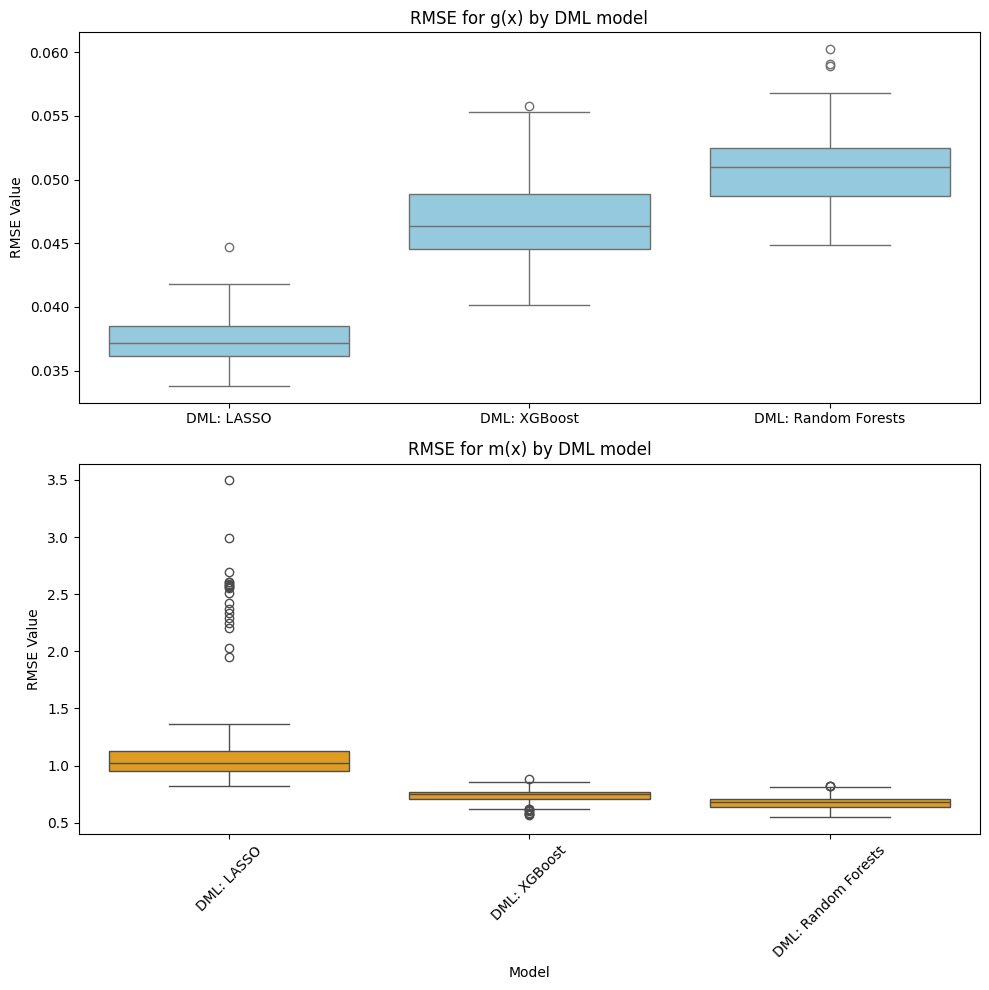

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Boxplot for g(x)
sns.boxplot(x="model", y="rmse_g(x)", data=rmse_results, ax=axes[0], color="skyblue")
axes[0].set_title('RMSE for g(x) by DML model')
axes[0].set_xlabel('')
axes[0].set_ylabel('RMSE Value')

# Boxplot for m(x)
sns.boxplot(x="model", y="rmse_m(x)", data=rmse_results, ax=axes[1], color="orange")
axes[1].set_title('RMSE for m(x) by DML model')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('RMSE Value')

# Rotate x-ticks for both plots
plt.xticks(rotation=45)

# Tight layout to adjust spacing
plt.tight_layout()

# Show the plots
plt.show()

## For DML coefficients

In [12]:
dml_results

,Coefficient,Bias,Standard Error,t-Statistic,p-Value,95% CI Lower,95% CI Upper,model_name,size_panel,simulation
0,0.0051,0.0051,0.0065,0.783732,0.433197,-0.0076,0.0178,DML: LASSO,17,1
1,0.0379,0.0379,0.0214,1.767093,0.077213,-0.0041,0.0799,DML: XGBoost,17,1
2,0.0378,0.0378,0.0177,2.129048,0.033250,0.0030,0.0726,DML: Random Forests,17,1
3,0.0021,0.0021,0.0010,2.154592,0.031194,0.0002,0.0040,DML: LASSO,17,2
4,0.0154,0.0154,0.0203,0.757659,0.448655,-0.0244,0.0552,DML: XGBoost,17,2
...,...,...,...,...,...,...,...,...,...,...
295,0.0432,0.0432,0.0214,2.022961,0.043077,0.0013,0.0851,DML: XGBoost,17,99
296,0.0438,0.0438,0.0188,2.326116,0.020012,0.0069,0.0806,DML: Random Forests,17,99
297,0.0192,0.0192,0.0076,2.534678,0.011255,0.0044,0.0341,DML: LASSO,17,100
298,0.0105,0.0105,0.0216,0.485701,0.627179,-0.0318,0.0528,DML: XGBoost,17,100


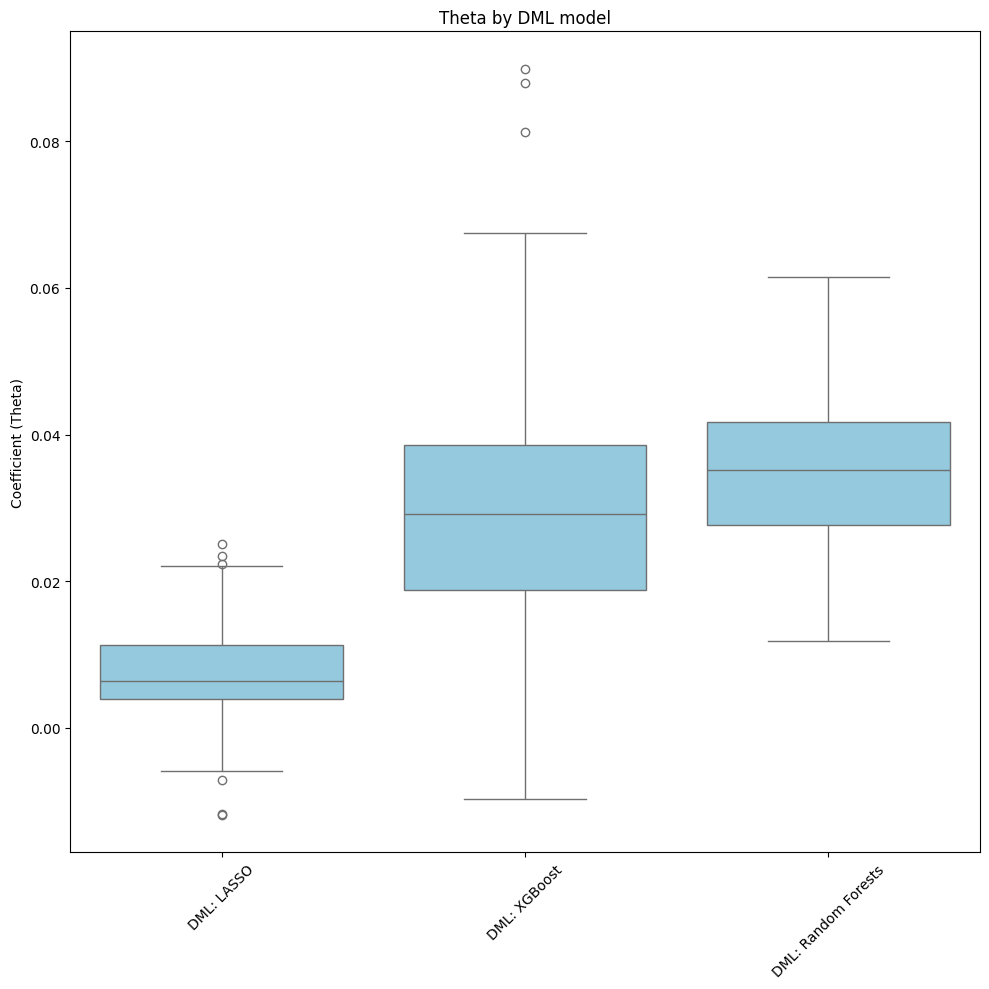

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

# Boxplot for g(x)
sns.boxplot(x="model_name", y="Coefficient", data=dml_results, ax=axes, color="skyblue")
axes.set_title('Theta by DML model')
axes.set_xlabel('')
axes.set_ylabel('Coefficient (Theta)')

# Rotate x-ticks for the plot
plt.xticks(rotation=45)

# Tight layout to adjust spacing
plt.tight_layout()